# C022: Shrodinger's equation for a quantum oscillator 

**Name: Sneha Ramshanker**
\n 
**Date: 20th November 2020**

The aim of this investigation is to find the numerical solutions to the time-independent schrodinger equation for the quantum harmonic oscillator. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.misc import derivative as der
from scipy.special import eval_hermite as herm

### Defining Classes and Functions

In [2]:
class ODE:
    """
    ODE contains are relevent functions related to defining and solving ordinary differential equations in the context of quantum mechanics
    
    
    Input Parameters:
    f (Type: Lambda Function) - an ODE function 
    x (Type: List/Array) - List of x values over which f is defined 
    psi0 (Type: float/integer) - Value of psi at x = 0 
    dpsi0 (Type: float/integer) - Value of first derivative of psi at x = 0 
    
    Optional Parameters: 
    isodd (Type: String) - By default it is set to even. It can be set to odd if user wants to. 
    """
    def __init__(self, f, x, psi0, dpsi0):
        self.f = f
        self.x = x 
        self.psi0 = psi0
        self.dpsi0 = dpsi0
        self.isodd = "even"
    
    #Defining Get Methods 
    def getf(self):
        return self.f
    def getx(self):
        return self.x
    def getpsi0(self):
        return self.psi0
    def getdpsi0(self):
        return self.dpsi0
    def getisodd(self):
        return self.isodd
    
    #Define add methods 
    def addisodd(self, input):
        self.isodd = input #Access to isodd is not private and can be edited using this method 
    
    #Defining Functions 
    def detdx(self):
        """
        Description: Function determines the spacing given a linearly spaced x list 
        
        Input Parameters: 
        N/A 
        
        Output Parameters:
        Spacing (Type: Float/Integer)
        """
        x = self.getx()
        return (x[1]-x[0])  
    
    def diff(self, function, x0, dx = 1e-6, n = 1):
        """
        Description: Function computes the nth derivative of a function
        
        Input Parameters:
        function (Type: Lambda/user-defined function): function whose derivative is being calculated 
        x0 (Type: Float/Integer): x point where derivative is calculated 
        
        Optional Parameters: 
        dx --> More information in scipy manual 
        n (Type: Integer): function computes the nth derivative (by default n = 1 so first derivative is calculated)
        
        Output Parameters:
        nth derivative (Type: List/Array)
        """
        return der(function, x0, dx, n)
    def psidx(self):
        """
        Description: function determines psi(dx) using Taylor expansion. The taylor expansion is separated by whether psi is odd or even. 
        
        Input Parameters:
        N/A
        
        Output Parameters:
        psidx (Type: Float/Integer)
        """
        dx = self.detdx()
        f = self.getf()
        psi0 = self.getpsi0()
        dpsi0 = self.getdpsi0()
        
        if self.getisodd() == 'even':
            psidx = psi0 + 0.5*(dx)**2*(f(0)*psi0)+(1/24)*(dx**4)*(self.diff(f, 0, n=2)*psi0+(2*self.diff(f,0)*dpsi0)+f(0)**2*psi0)
            #psidx = (1/24)*(dx**4)*(self.diff(f, 0, n=2)*psi0+(2*self.diff(f,0)*dpsi0)+f(0)**2*psi0)
        elif self.getisodd() == 'odd':
            psidx = dx*dpsi0 + (dx**3)*(1/6)*(f(0)*dpsi0+self.diff(f,0)*psi0)
        else:
            psidx = "Error"
        return psidx
    def solve_numerov(self):
        """
        Description: solves an ode of the form ddpsi = f*psi using the numerov method. 
        
        Input Parameters: 
        N/A
        
        Output Parameters:
        psi (Type: List)
        """
        psi0 = self.getpsi0()
        psidx = self.psidx() 
        psi = [psi0, psidx]
        dx = self.detdx()
        f = self.getf()
        for j in range(1, len(self.x)-1):
            A1 = 2+((5/6)*dx**2*f(j*dx))
            A2 = (1-((dx**2)/12)*f((j-1)*dx))
            A3 = (1-((dx**2)/12)*f((j+1)*dx))
            
            psi.append((A1*psi[j]-A2*psi[j-1])/A3)
        return psi
    def plosol(self):
        """
        Description: Plots solution obtained using solve_numerov(). 
        
        Input Parameters:
        N/A 
        
        Output Parameters:
        N/A 
        """
        x = self.getx()
        psi = self.solve_numerov()
        plt.plot(x, psi)

In [3]:
class QMosc:
    """
    QMosc contains are relevent functions related to finding solutions for a Quantum Harmonic Oscillator 
    
    Input Parameters:
    dx (Type: Float/Integer) - spacing 
    x1 (Type: Float/Integer) - upper bound for x  
    n (Type: integer) - energy level 
    E (Type: float/integer) - energy of oscillator 
    
    """
    def __init__(self, dx, x1, n , E):
        self.dx = dx
        self.x1 = x1
        self.n = n 
        self.E = E
        
    #Defining get methods 
    def getdx(self):
        return self.dx
    def getx1(self):
        return self.x1
    def getn(self):
        return self.n
    def getE(self):
        return self.E
    
    #Define change methods 
    def changeE(self, E):
        self.E = E
        
    #Other methods
    def genx(self):
        """
        Description: Generates a x array 
        
        Input Parameters:
        N/A
        
        Output Parameters:
        x (Type: Array) Array from 0 to x1 with equal spacing dx 
        """
        x1 = self.getx1()
        dx = self.getdx()
        x = np.arange(0, x1, dx)
        return x
    def normalize(self,list):
        """
        Description: Normalizes a list 
        
        Input Parameters:
        list (Type list): List to be normalized 
        
        Output Parameters:
        normalized list 
        """
        return np.divide(list, max(list))
    def analytic_solve(self, x = 'default' , norm = True):
        """
        Description: Find the Analytical Solution 
        
        Input Parameters:
        N/A
        
        Optional Parameters:
        x (Type: String/List): Custom x input if user wants a different range for the ODE. By default the x is set to output of genx()
        norm (Type: Bool): Should psi be normalized or not. By default psi is normalized 
        
        Return:
        psi (Type: List): Returns analytical solutions psi 
        """
        n = self.getn()
        if x == 'default':
            x = self.genx()
        Hermite = herm(n, x) #Using scipy package to determine the Hermite polynomials 
        Exp = np.exp(-0.5*np.multiply(x, x))
        psi = Hermite*Exp
        if norm == True:
            return self.normalize(psi)
        else:
            return psi
    def numeric_solve(self, norm = True):
        """
        Description : Finding numerical solution of the QM oscillator using numerov method defined in ODE class 
        
        Input Parameters:
        N/A
        
        Optional Parameters:
        norm (Type Bool): Should psi be normalized or not. By default psi is normalized. 
        
        Output Parameters:
        psi: Numerical solution psi 
        """
        E = self.getE()
        x = self.genx()
        if self.getn()%2 == 0:
            
            qmode = ODE(lambda y: y**2-E, x, 1, 0) #defining ode where f = x^2 - E 
        else:
            
            qmode = ODE(lambda y: y**2-E, x, 0, 1)
            qmode.addisodd('odd')
        if norm == True:
            return self.normalize(qmode.solve_numerov())
        else:
            return self.normalize(qmode.solve_numerov())
    def plot_num(self, scale = 1, marker = 'o', legend = "Numerical Solution"):
        """
        Description: Plots the numerical solution 
        
        Input Parameters:
        N/A
        
        Optional Parameters:
        scale (Type: Float/Integer): Scale to adjust numerical solution by. By default scale = 1 
        marker (Type: String): Marker to plot numerical solution. By default marker = 'o'
        legend (Type: String): Legend label to be used on the plot. By defaul label = "Numerical Solution"
        
        Output Parameters:
        None
        """
        xpos = self.genx() 
        psipos = self.numeric_solve()
        xneg = self.genx()*-1
        if self.getn()%2 == 0: #If psi is even
            psineg = self.numeric_solve() 
            
        else: 
            psineg = self.numeric_solve()*-1  #If psi is odd 
        x = np.concatenate((xpos, xneg), axis = 0)
        psi = np.concatenate((psipos, psineg), axis = 0)
        plt.plot(x, psi*scale, marker, label = legend)
        plt.legend()
        
    def plot_an(self, scale=1, marker = '--', legend = "Analytical Solution"):
        """
        Description: Plots analytical solution
        
        Input Parameters: 
        N/A
        
        Optional Parameters:
        scale (Type: Float/Integer): Scale to adjust numerical solution by. By default scale = 1 
        marker (Type: String): Marker to plot numerical solution. By default marker = '--'
        legend (Type: String): Legend label to be used on the plot. By defaul label = "Analytical Solution"
        
        Output Parameters:
        None
        """
        xpos = self.genx()
        xneg = self.genx()*-1
        xtot = np.concatenate((xpos, xneg), axis = 0)
        psi = self.analytic_solve(x = xtot)
        plt.plot(xtot, psi*scale, marker, label = legend)
        plt.legend()
        
    def eigenvalue(self, e0 = 1, step = 0.01):
        """
        Description: Numerically approximates eigenvalue
        
        Input Parameters: 
        N/A
        
        Optional Parameters:
        e0 (Type: Float/Integer): Approximate guess of eigenvalue. By default e0 = 1
        step (Type: String): Step size to use while scanning for the eigenvalue. By default step = 0.01
       
        Output Parameters:
        Eigenvalue (Type: Float/Integer): Energy of the system in eigenvalue configuration
        """
        self.changeE(e0)
        psi = self.numeric_solve()
        slopeinit = (psi[-1]-psi[-2])/(self.getdx())
        if slopeinit > 0:
            slope = slopeinit
            while slope > 0: 
                slope_before = slope 
                Ecurrent = self.getE()
                self.changeE(Ecurrent-step)
                psi = self.numeric_solve()
                slope = (psi[-1]-psi[-2])/(self.getdx())
                if abs(slope) > abs(slope_before): #Checking that the direction of scan is the right direction and if not reverse the direction
                    step = step*-1
        else:
            slope = slopeinit
            while slope < 0: 
                slope_before = slope 
                Ecurrent = self.getE()
                self.changeE(Ecurrent+step)
                psi = self.numeric_solve()
                slope = (psi[-1]-psi[-2])/(qm.getdx())
                if abs(slope) > abs(slope_before):
                    step = step*-1
        return(self.getE()) 

### Executing the code 

Comparing Numerical and Analytic solution of a quantum oscillator with the following parameters: dx = 0.05, x1 = 5, n = 3, energy = 6.99 and Determining closest eigenvalue numerically. 

C:\Users\sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


6.99


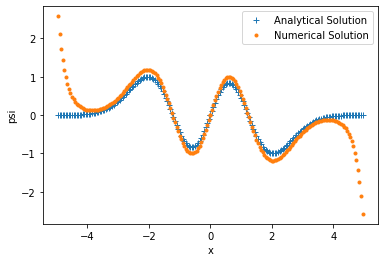

In [4]:
qm = QMosc(0.05,5, 3, 6.99)
qm.plot_an(-1, marker = '+')
qm.plot_num(1, marker = '.')
plt.xlabel('x')
plt.ylabel('psi')
print(qm.eigenvalue(e0 = 7))

Comparing how energy changes how close the numerical solution is to the analytical solution. For n = 0 case, E = 0.95, 1, and 1.05 are evaluated. 

C:\Users\sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


8.309999999999972


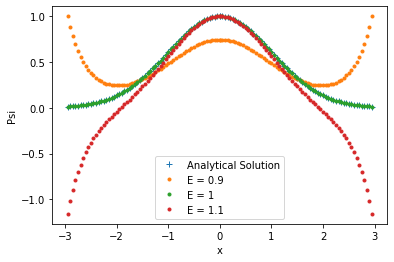

In [17]:
qm = QMosc(0.05,3, 0, 1)
qm.plot_an(1, marker = '+')
E = [0.9, 1, 1.1]
for i in range(0, len(E)):
    qm.changeE(E[i])
    qm.plot_num(1, marker = '.', legend = "E = "+str(E[i]))
plt.xlabel('x')
plt.ylabel('Psi')
print(qm.eigenvalue(e0 = 7))

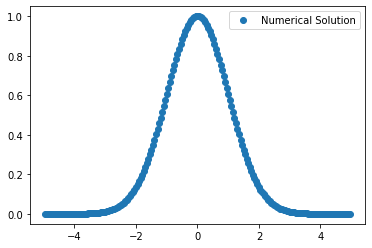

In [9]:
n = 6
qm = QMosc(0.05, 5, 0, 1)
qm.plot_num(1)